In [ ]:
import numpy as np
import cobra
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
from helper_function import *
plt.rcParams['font.family'] = 'Arial'

In [ ]:
model = cobra.io.load_matlab_model('universal_model.mat')
with open('FBAsolution/M9_sufficient_423_1_proteome_weakbg_unimodel.pkl', 'rb') as pickle_file:
    data2 = pickle.load(pickle_file)
    all_total_nutrient_count2 = data2['all_total_nutrient_count']
    all_total_intake2 = data2['all_total_intake']
    all_growth_rate2 = data2['all_growth_rate']
    all_random_medium2 = data2['all_random_medium']
    all_met_flux2 = data2['all_met_flux']
    del data2

Set parameter Username
Academic license - for non-commercial use only - expires 2026-08-29


In [3]:
S_df = cobra.util.create_stoichiometric_matrix(model, array_type='DataFrame')
reaction_list = list(S_df.columns)
metabolite_list = list(S_df.index)

In [4]:
S = S_df.to_numpy()

In [5]:
currency_mets = [
    'ctp[c]', 'cdp[c]', 'pi[c]', 'h[c]', 'gtp[c]', 'gdp[c]', 'itp[c]', 'idp[c]', 'nadph[c]', 'nadp[c]', 'fadh2[c]', 'fad[c]',
    'fmnh2[c]', 'fmn[c]', 'mql8[c]', 'mqn8[c]', '2dmmql8[c]', '2dmmq8[c]', 'accoa[c]', 'coa[c]', 'nad[c]', 'nadh[c]', 'atp[c]', 'adp[c]', 'ppi[c]','pppi[c]'
    'q8[c]', 'q8h2[c]','cbi[c]', 'amp[c]', 'udp[c]','cmp[c]', 'o2[c]','h2o[c]','co2[c]',

    'dmbzid[c]','PGPm1[c]', 'apoACP[c]', 'ACP[c]','malACP[c]','dnarep[c]','proteinsynth[c]','rnatrans[c]',

    'ctp[p]', 'cdp[p]', 'pi[p]', 'h[p]', 'gtp[p]', 'gdp[p]', 'itp[p]', 'idp[p]', 'nadph[p]', 'nadp[p]', 'fadh2[p]', 'fad[p]',
    'fmnh2[p]', 'fmn[p]', 'mql8[p]', 'mqn8[p]', '2dmmql8[p]', '2dmmq8[p]', 'accoa[p]', 'coa[p]', 'nad[p]', 'nadh[p]', 'atp[p]', 'adp[p]', 'ppi[p]','pppi[p]'
    'q8[p]', 'q8h2[p]','cbi[p]', 'amp[p]', 'udp[p]','cmp[p]', 'o2[p]','h2o[p]','co2[p]',

    'dmbzid[p]','PGPm1[p]', 'apoACP[p]', 'ACP[p]','malACP[p]','dnarep[p]','proteinsynth[p]','rnatrans[p]',

    'ctp[e]', 'cdp[e]', 'pi[e]', 'h[e]', 'gtp[e]', 'gdp[e]', 'itp[e]', 'idp[e]', 'nadph[e]', 'nadp[e]', 'fadh2[e]', 'fad[e]',
    'fmnh2[e]', 'fmn[e]', 'mql8[e]', 'mqn8[e]', '2dmmql8[e]', '2dmmq8[e]', 'accoa[e]', 'coa[e]', 'nad[e]', 'nadh[e]', 'atp[e]', 'adp[e]', 'ppi[e]','pppi[e]'
    'q8[e]', 'q8h2[e]','cbi[e]', 'amp[e]', 'udp[e]','cmp[e]', 'o2[e]','h2o[e]','co2[e]',

    'dmbzid[e]','PGPm1[e]', 'apoACP[e]', 'ACP[e]','malACP[e]','dnarep[e]','proteinsynth[e]','rnatrans[e]',
    'h2o[p]','co2[p]','h[p]','pi[p]','co2[p]',
    # 'nh4[c]',
    # 'mn2[p]', 'cu2[p]', 'pi[p]','cobalt2[p]',  'mg2[p]','co2[p]', 'o2[p]', 'cl[p]','zn2[p]', 'so4[p]', 'fe3[p]',
    #  'k[p]', 'nh4[p]','ca2[p]','fe2[p]',
    'h2o[e]','co2[e]','biomass[e]'
    
    ]
for met in currency_mets:
    if met in metabolite_list:
        S[metabolite_list.index(met), :] = 0

In [83]:
import os
import numpy as np
from scipy.sparse import load_npz

union_M = np.zeros((S.shape[1] * 2, S.shape[1]*2))

# 多个文件夹路径组成的列表
folder_list = ['flow_graph_423', 'flow_graph_uni_423', 'flow_graph_60']  # 替换为你的路径

for folder_path in folder_list:
    for filename in os.listdir(folder_path):
        if filename.endswith('.npz'):
            path = os.path.join(folder_path, filename)
            try:
                mat = load_npz(path)
                union_M += mat.toarray()
            except Exception as e:
                print(f"Error loading {path}: {e}")

In [93]:
import networkx as nx
G_mfg = nx.DiGraph()
rxn_nodes = [f"{name}_fwd" for name in reaction_list] + [f"{name}_bwd" for name in reaction_list]

for i in range(len(rxn_nodes)):
    for j in range(len(rxn_nodes)):
        if union_M[i, j] > 1e-2:  # threshold to show
            G_mfg.add_edge(rxn_nodes[i], rxn_nodes[j], weight=round(union_M[i, j], 2))


In [95]:
in_degrees = dict(G_mfg.in_degree())
out_degrees = dict(G_mfg.out_degree())

# 分别按度数由大到小排序
sorted_in_degrees = sorted(in_degrees.items(), key=lambda x: x[1], reverse=True)
sorted_out_degrees = sorted(out_degrees.items(), key=lambda x: x[1], reverse=True)

print("节点入度排序 (node, in-degree):")
for node, degree in sorted_in_degrees:
    print(f"{node}: {degree}")

print("\n节点出度排序 (node, out-degree):")
for node, degree in sorted_out_degrees:
    print(f"{node}: {degree}")

节点入度排序 (node, in-degree):
bio1_fwd: 370
biomass525_fwd: 269
biomass345_fwd: 183
biomass536_fwd: 165
biomass365_fwd: 161
biomass524_fwd: 161
biomass253_fwd: 144
biomass370_fwd: 138
biomass364_fwd: 137
biomass090_fwd: 133
biomass344_fwd: 131
biomass462_fwd: 127
biomass324_fwd: 126
biomass398_fwd: 122
biomass336_fwd: 122
biomass376_fwd: 121
ALAD_R_bwd: 118
biomass232_fwd: 116
biomass512_fwd: 113
biomass468_fwd: 113
biomass498_fwd: 113
ALATA_L_bwd: 112
biomass276_fwd: 105
biomass509_fwd: 105
GLUDy_bwd: 105
biomass205_fwd: 104
biomass359_fwd: 103
biomass161_fwd: 102
biomass486_fwd: 102
biomass289_fwd: 101
biomass084_fwd: 101
biomass304_fwd: 100
biomass258_fwd: 99
biomass377_fwd: 96
biomass400_fwd: 95
biomass346_fwd: 94
DXPS_fwd: 93
DCYSDS_bwd: 93
biomass277_fwd: 90
biomass043_fwd: 90
biomass419_fwd: 86
POR4_bwd: 85
biomass148_fwd: 85
biomass518_fwd: 85
biomass513_fwd: 84
biomass223_fwd: 83
biomass046_fwd: 83
biomass238_fwd: 81
biomass051_fwd: 81
biomass375_fwd: 80
ACLS_a_fwd: 79
PFL_fwd: 79

In [ ]:
import random
import numpy as np
from node2vec import Node2Vec
from sklearn.cluster import KMeans
import networkx as nx

# 设置随机种子
random.seed(42)
np.random.seed(42)

node2vec = Node2Vec(
    G_mfg,
    dimensions=64,
    walk_length=30,
    num_walks=200,
    workers=4,
    seed=42,
    p=16,
    q=16
)

# # 训练 Word2Vec 模型
model2 = node2vec.fit(window=10, min_count=1, batch_words=4, seed=42) 
nodes = list(G_mfg.nodes())
node_vectors = np.array([model2.wv[str(n)] for n in nodes])


Computing transition probabilities:   0%|          | 0/3658 [00:00<?, ?it/s]

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:04<00:00, 11.07it/s]


In [204]:
# 聚类（输入向量已经稳定）
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20, random_state=44)
labels = kmeans.fit_predict(node_vectors)

/home/complicatedz/miniconda3/envs/autopacman/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [205]:
clustered_nodes = {i: [] for i in range(20)}
nodes = list(G_mfg.nodes())
for node, label in zip(nodes, labels):
    clustered_nodes[label].append(node)

# 可选打印
for cid, members in clustered_nodes.items():
    print(f"Cluster {cid}: {len(members)} nodes")

Cluster 0: 474 nodes
Cluster 1: 106 nodes
Cluster 2: 334 nodes
Cluster 3: 279 nodes
Cluster 4: 90 nodes
Cluster 5: 209 nodes
Cluster 6: 150 nodes
Cluster 7: 187 nodes
Cluster 8: 159 nodes
Cluster 9: 286 nodes
Cluster 10: 235 nodes
Cluster 11: 125 nodes
Cluster 12: 187 nodes
Cluster 13: 66 nodes
Cluster 14: 88 nodes
Cluster 15: 159 nodes
Cluster 16: 151 nodes
Cluster 17: 124 nodes
Cluster 18: 91 nodes
Cluster 19: 158 nodes


/home/complicatedz/miniconda3/envs/autopacman/lib/python3.8/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipykernel_463792/1368969828.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("tab20", len([u for u in uniq if u != -1]) or 1)


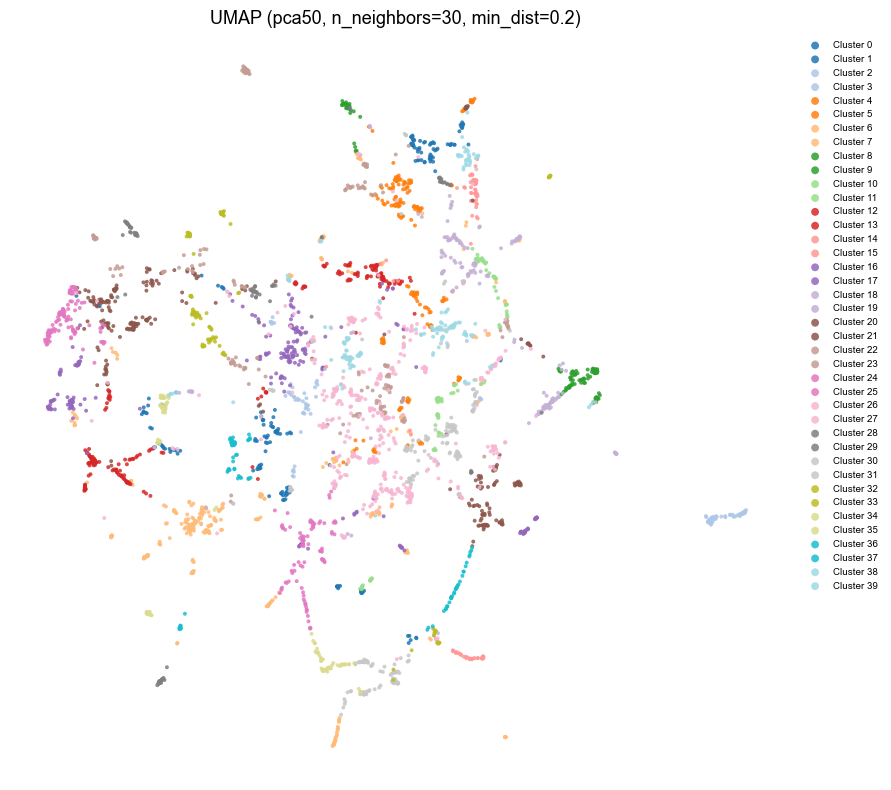

In [279]:
# ===== Requirements =====
# pip install umap-learn matplotlib scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import umap.umap_ as umap
import matplotlib.cm as cm

# ---- 必备输入 ----
# nodes:           List[Any]，与 node_vectors 的行一一对应
# node_vectors:    np.ndarray, shape (N, d)
# clustered_nodes: dict[int, List[Any]]  => {簇ID: [node, ...]}

def invert_clusters(cluster_dict):
    """把 {cid: [node,...]} 转成 {node: cid}"""
    return {node: cid for cid, lst in cluster_dict.items() for node in lst}

def labels_from_clusters(nodes, clustered_nodes, unknown_label=-1):
    """按 nodes 顺序生成标签数组；未出现在聚类字典中的节点标为 unknown_label"""
    inv = invert_clusters(clustered_nodes)
    return np.array([inv.get(n, unknown_label) for n in nodes], dtype=int)

def umap_plot_for_clusters(node_vectors, nodes, clustered_nodes,
                           pca_dim=50, n_neighbors=30, min_dist=0.2,
                           metric="cosine", random_state=42,
                           figsize=(8,7), point_size=8,
                           save_path=None, title="UMAP of clustered_nodes"):
    # 1) 行归一化（对余弦度量很重要）
    X = normalize(node_vectors)

    # 2) 可选 PCA 去噪/加速
    if pca_dim is not None and pca_dim < X.shape[1]:
        X = PCA(n_components=pca_dim, random_state=random_state).fit_transform(X)

    # 3) UMAP 到 2D
    U = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric=metric,
        random_state=random_state
    ).fit_transform(X)

    # 4) 生成标签（与 nodes 顺序一致）
    labels = labels_from_clusters(nodes, clustered_nodes, unknown_label=-1)

    # 5) 可视化（unknown 单独灰色，其余用离散 colormap）
    uniq = np.unique(labels)
    uniq = uniq[np.argsort(uniq)]  # 排序
    cmap = cm.get_cmap("tab20", len([u for u in uniq if u != -1]) or 1)

    plt.figure(figsize=figsize)
    # 先画 unknown
    mask_unknown = (labels == -1)
    if mask_unknown.any():
        plt.scatter(U[mask_unknown, 0], U[mask_unknown, 1],
                    s=point_size, c="#C0C0C0", label="Unassigned", alpha=0.8)

    # 再画各簇
    color_idx = 0
    for cid in uniq:
        if cid == -1:  # 跳过 unknown（已经画过）
            continue
        mask = (labels == cid)
        if not np.any(mask):
            continue
        plt.scatter(U[mask, 0], U[mask, 1],
                    s=point_size, c=[cmap(color_idx)],
                    label=f"Cluster {cid}", alpha=0.85, edgecolors="none")
        color_idx += 1

    plt.title(title, fontsize=13)
    plt.axis("off")
    # 图例：簇太多时可能很挤，可改为 bbox_to_anchor 调到外侧
    if len(uniq) <= 20:
        plt.legend(loc="best", fontsize=8, markerscale=2)
    else:
        plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0),
                   fontsize=7, markerscale=2, frameon=False)

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()

# ===== 调用示例 =====
umap_plot_for_clusters(node_vectors, nodes, clustered_nodes,
                       pca_dim=50, n_neighbors=30, min_dist=0.2,
                       metric="cosine", random_state=42,
                       figsize=(9,8), point_size=8,
                       title="UMAP (pca50, n_neighbors=30, min_dist=0.2)")
